In [3301]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3302]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy. stats as stats
from sklearn.metrics import mean_squared_error
import datetime
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score


In [3303]:
df = pd.read_csv(r"C:\MY FILE\MBAN 6110S-Data Science\assignment3\kc_house_data.csv")

In [3304]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3305]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


Data quality issues 
- convert datatype:  
        ' date' /''yr_built'/ 'yr_renovated' / 'zipcode'

- Remove outliers
     

- convert to dummie variables: 'waterfront', 'view', 'grade','condition


In [3306]:
# Convert datatype
df['date'] = pd.to_datetime(df['date'])
df['yr_built'] = pd.to_datetime(df['yr_built'])
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])
df['zipcode'] = df['zipcode'].astype(object)
df['waterfront'] = df['waterfront'].astype(bool)
df['view'] = df['view'].astype(object)
df['grade'] = df['grade'].astype(object)


In [3307]:
current_year = datetime.datetime.now().year
df['house_age'] = current_year - df['yr_built'].dt.year
df['reno_age'] = current_year - df['yr_renovated'].dt.year
#df['price_per_sqft'] = df['price']/df['sqft_living']

In [3308]:
# create dummie variables 
#dummies_view = pd.get_dummies(df.view, prefix= 'view', dtype= int)
#dummies_waterfront = pd.get_dummies(df.waterfront, prefix='wf',dtype =int)
#dummies_grade = pd.get_dummies(df.grade, prefix='grade', dtype = int)
#dummies_condition = pd.get_dummies(df.condition, prefix='condition', dtype= int)
#df = pd.concat([df,dummies_view,dummies_waterfront,dummies_condition,dummies_grade], axis=1)

#df2.head()


In [3309]:
# extract year, month and create new columns 
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [3310]:
#drop columns
df = df.drop('id', axis=1)
df = df.drop('date', axis=1)

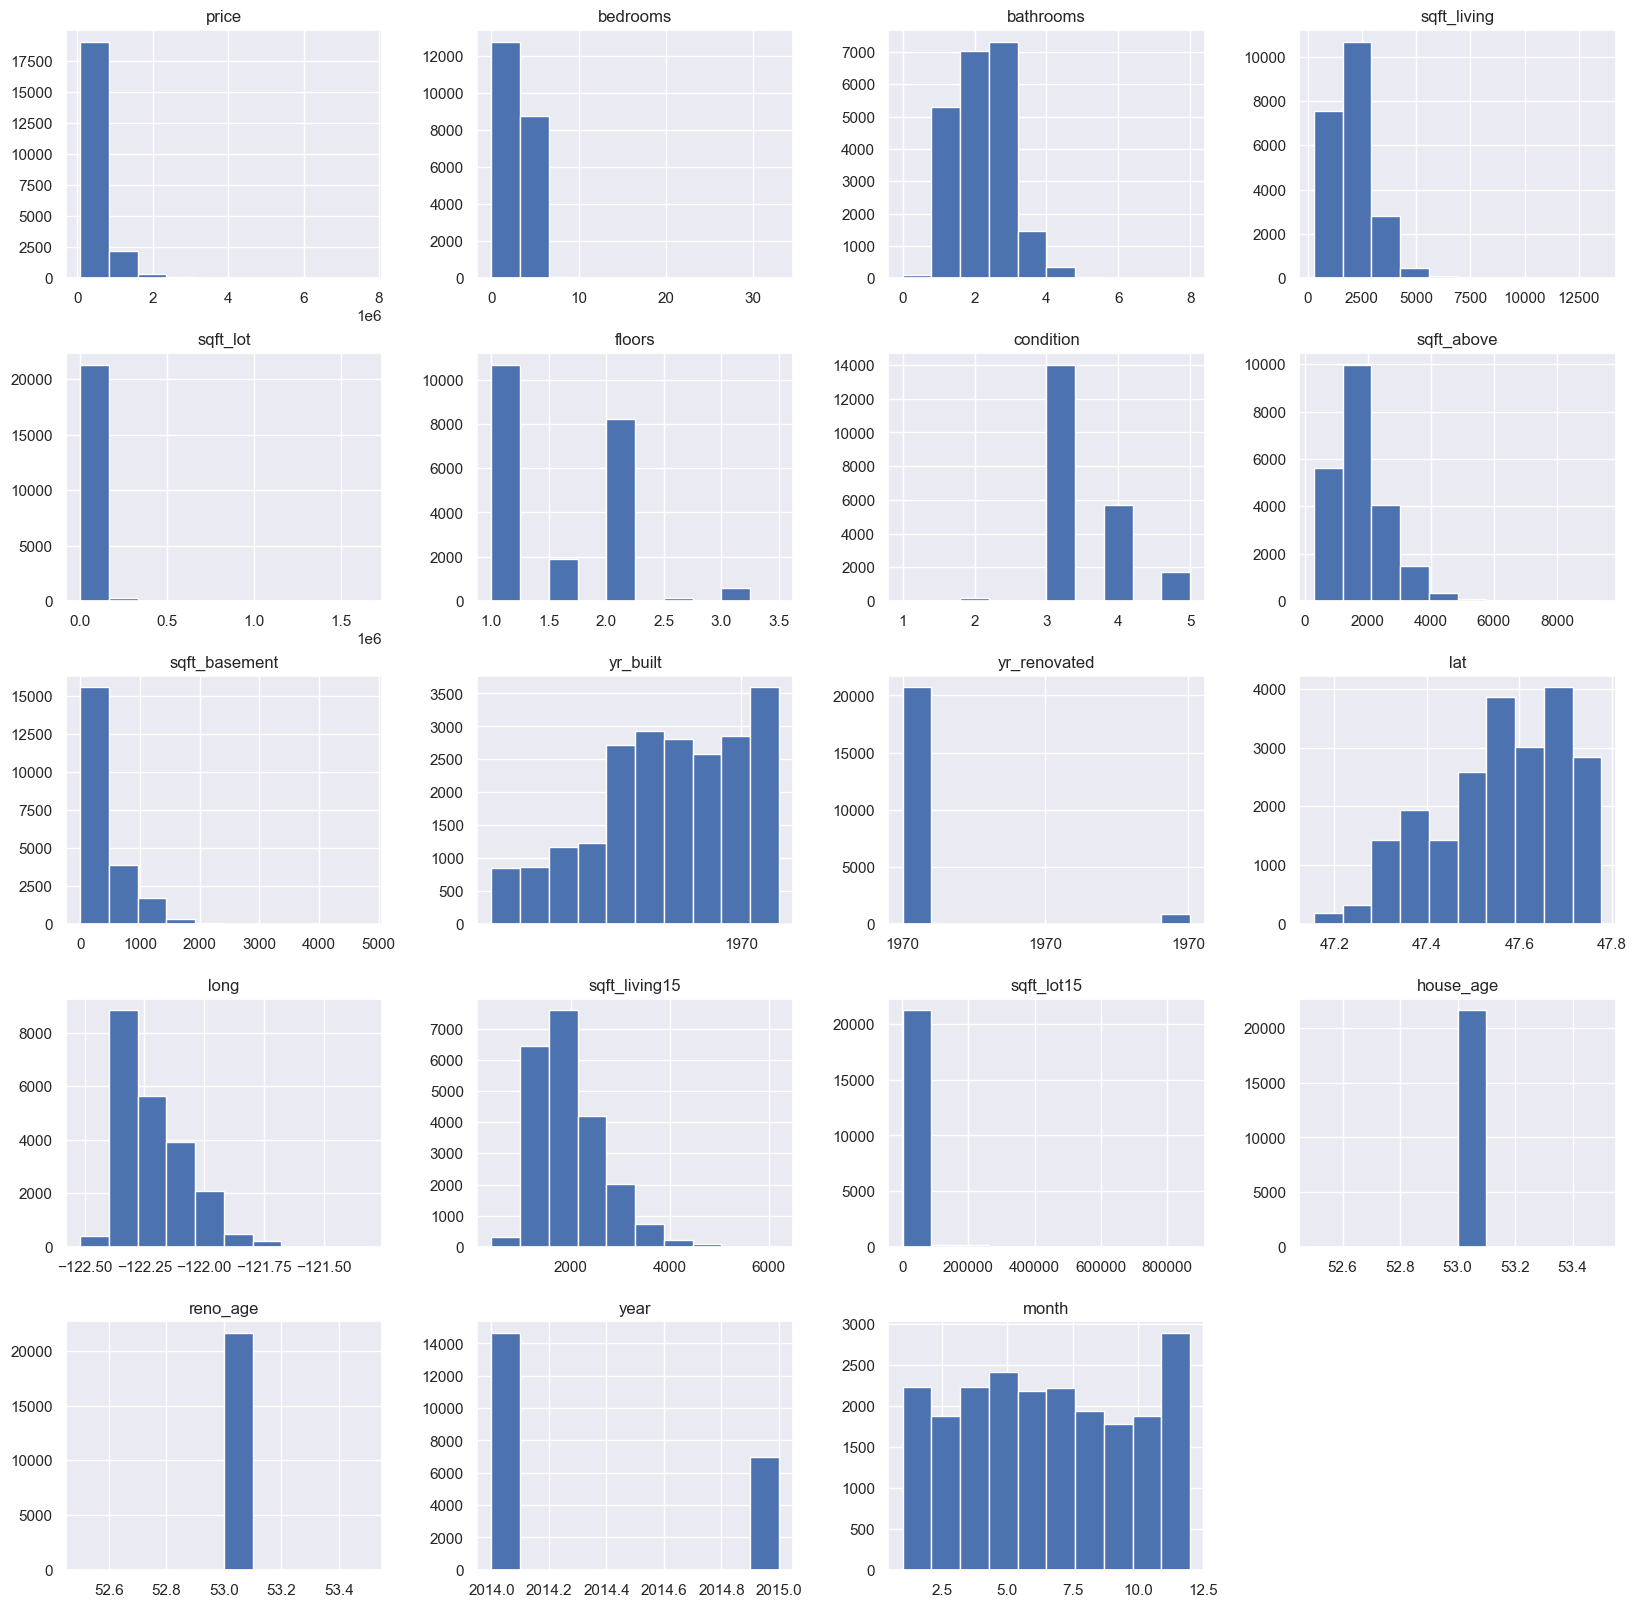

In [3311]:
# check the distributions
df.hist(figsize=(20,20))
plt.show()

 Check and drop outliers which are fall outside of boxplot

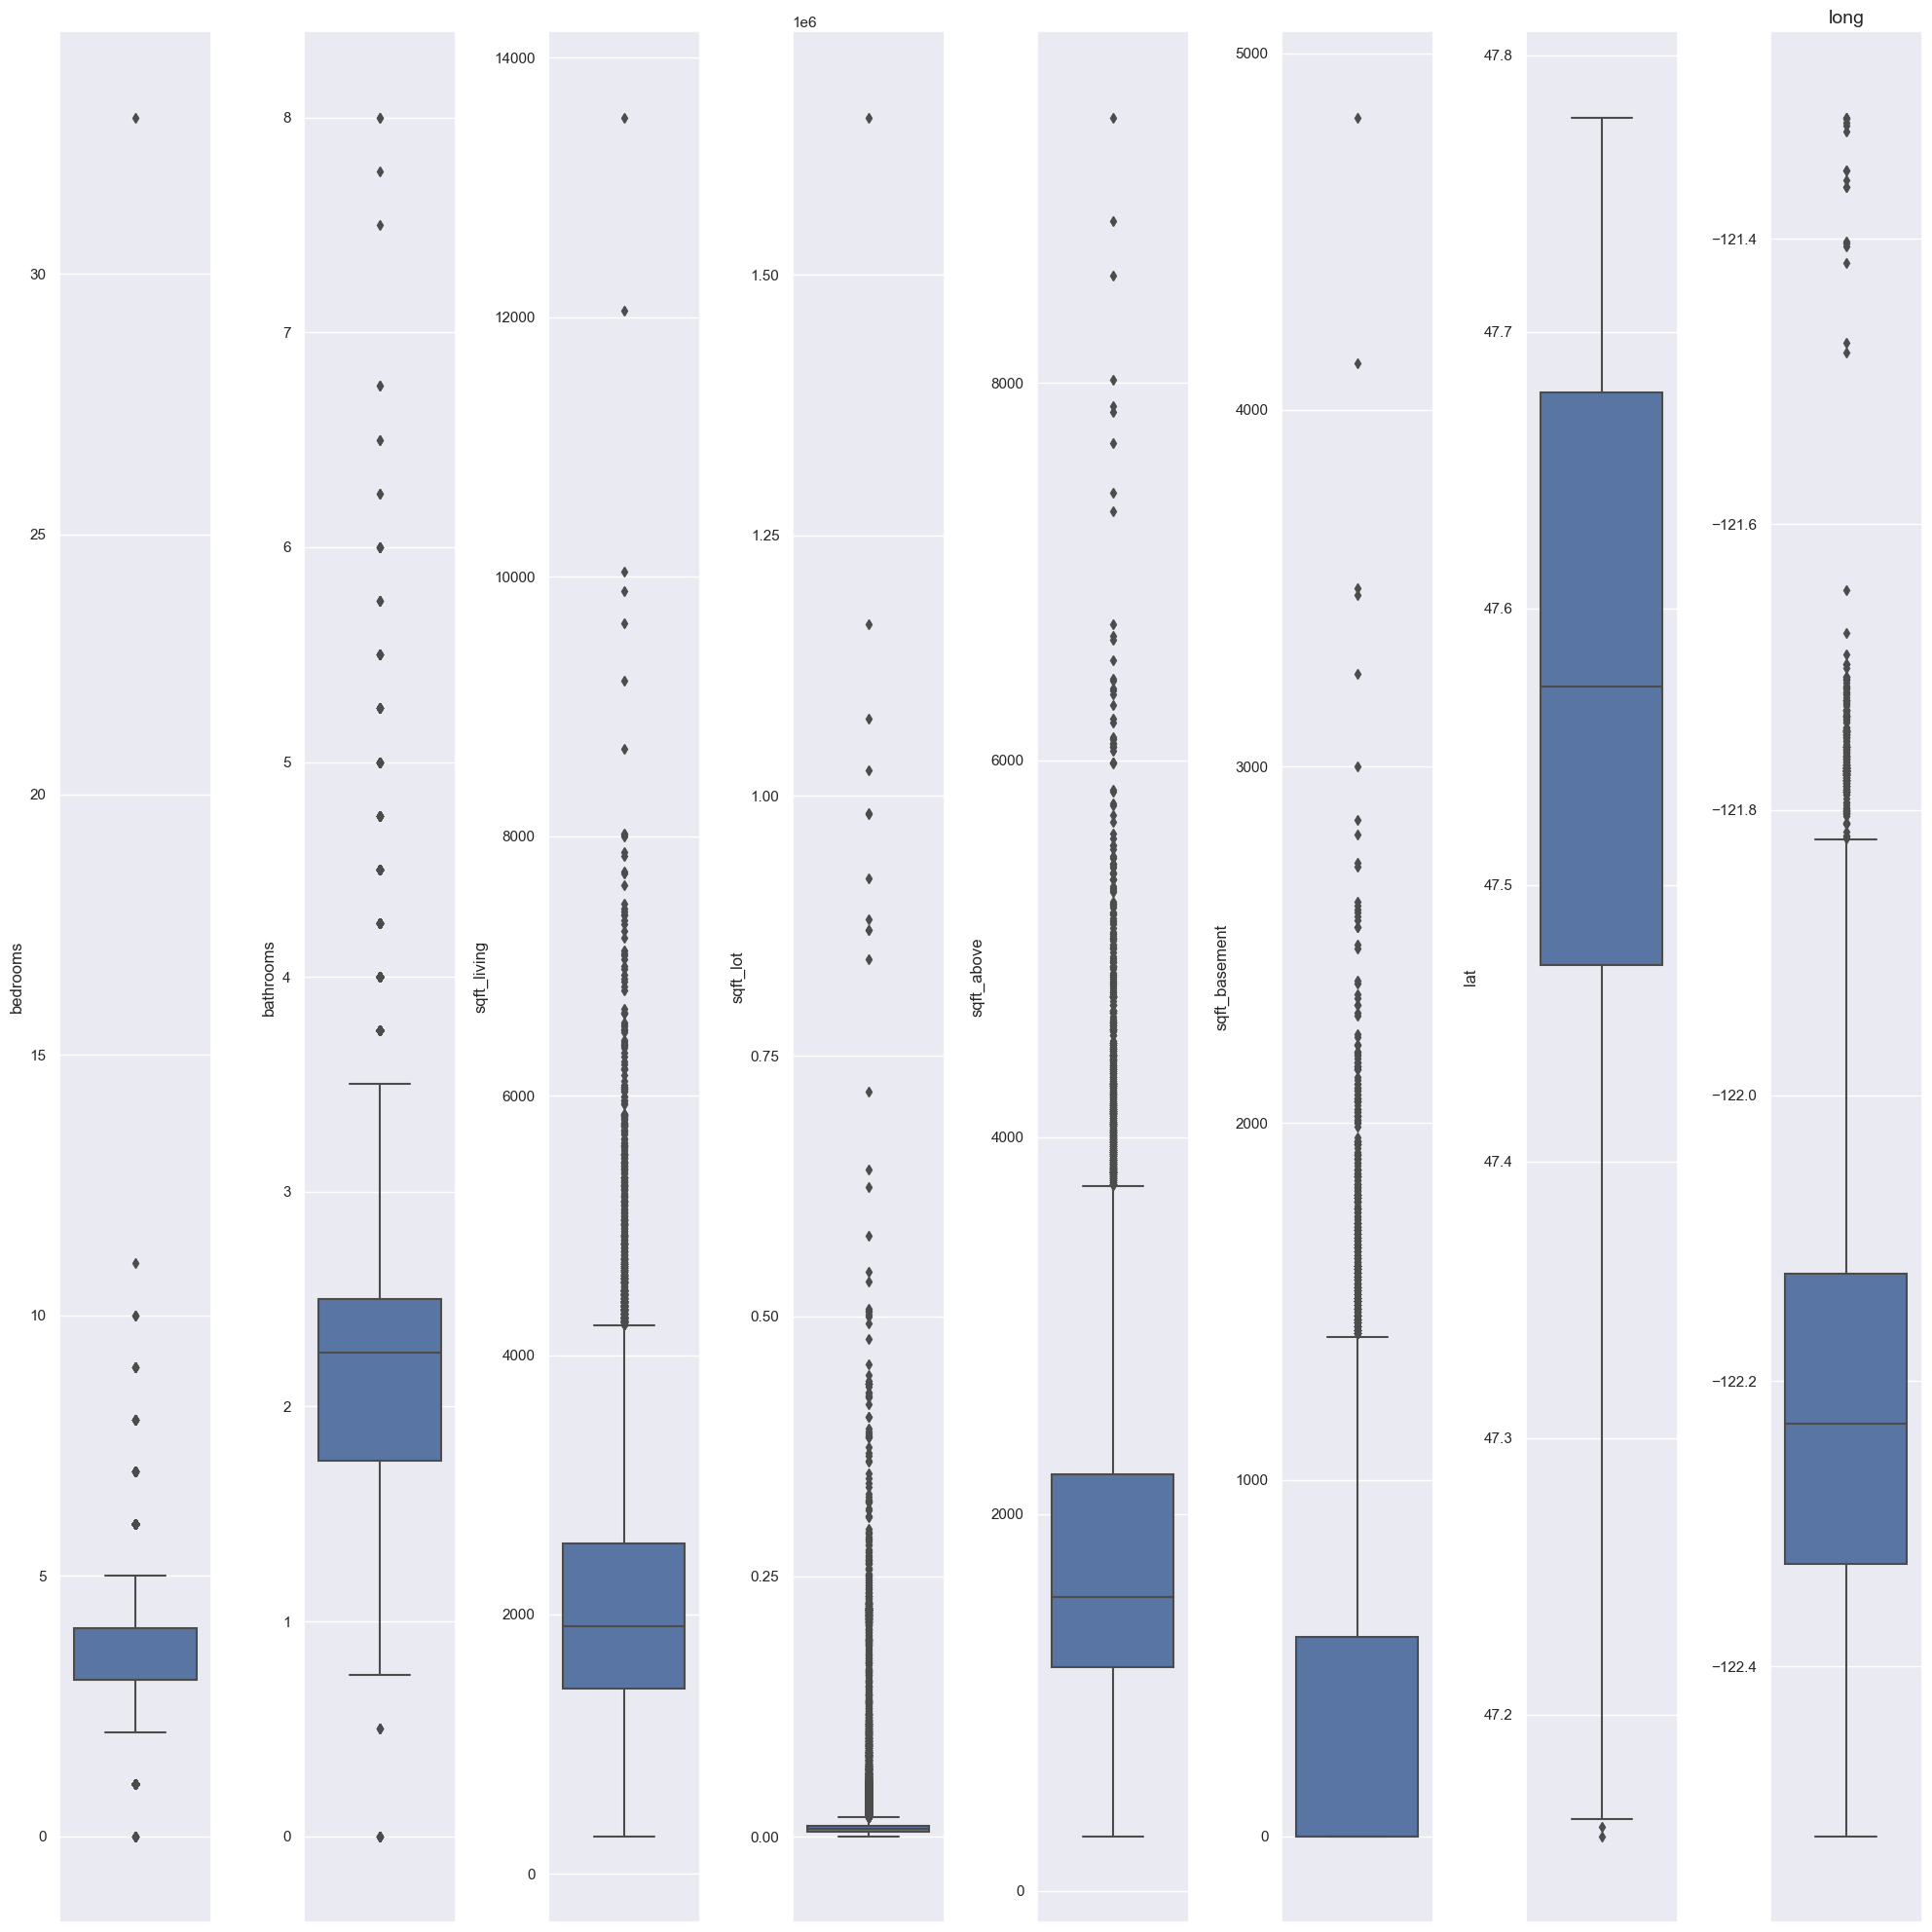

In [3312]:
cols =['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat','long']

flg, axes = plt.subplots(1, len(cols), figsize=(20,20))

for i, col in enumerate(cols):
    sns.boxplot(y=col, data=df, ax=axes[i])
axes[i].set_title(col, fontsize=14)
axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'bedrooms')

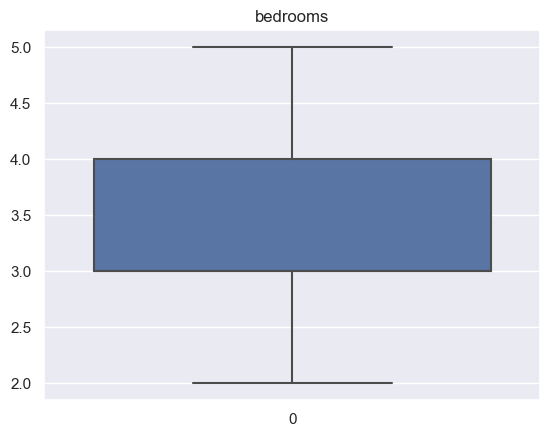

In [3313]:
df = df.drop(df[df['bedrooms'] > 5].index)
df = df.drop(df[df['bedrooms'] < 2].index)
sns.boxplot(df['bedrooms'])
plt.title('bedrooms')



Text(0.5, 1.0, 'sqft_living')

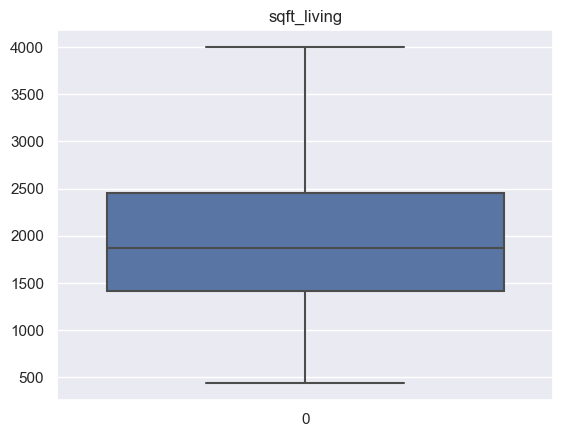

In [3314]:
df = df.drop(df[df['sqft_living'] > 4000].index)
df = df.drop(df[df['sqft_living'] < 290].index)
sns.boxplot(df['sqft_living'])
plt.title('sqft_living')

In [3315]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'house_age', 'reno_age', 'year',
       'month'],
      dtype='object')

Text(0.5, 1.0, 'bathrooms')

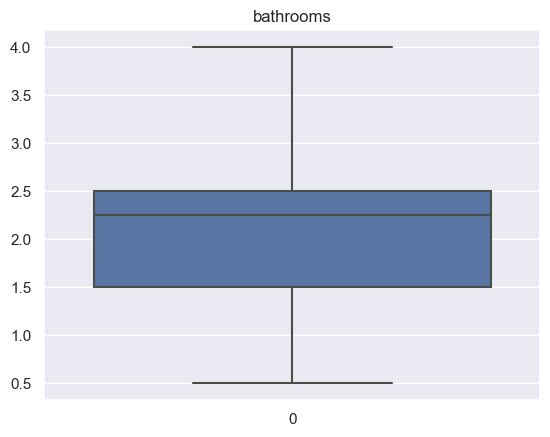

In [3316]:
df = df.drop(df[df['bathrooms'] >4].index)
sns.boxplot(df['bathrooms'])
plt.title('bathrooms')

In [3317]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'house_age', 'reno_age', 'year',
       'month'],
      dtype='object')

Text(0.5, 1.0, 'sqft_lot')

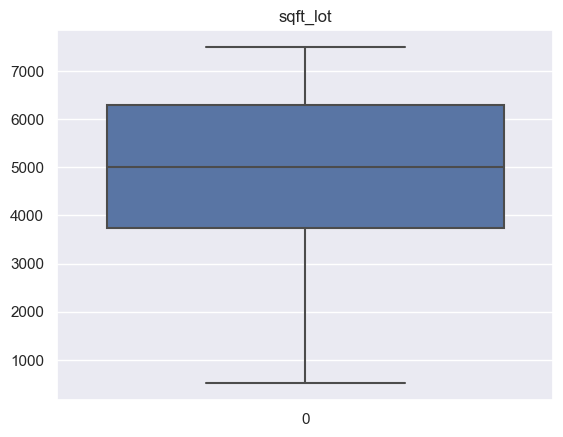

In [3318]:
df = df.drop(df[(df['sqft_lot'] > 7500)].index)
df = df.drop(df[df['sqft_lot'] < 520].index)
sns.boxplot(df['sqft_lot'])
plt.title('sqft_lot')

Text(0.5, 1.0, 'sqft_basement')

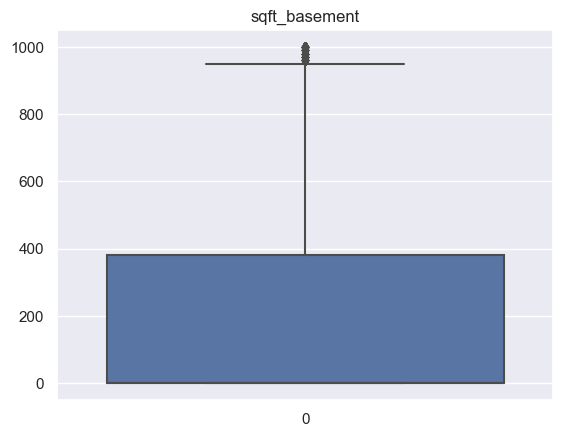

In [3319]:
df = df.drop(df[df['sqft_basement'] >1000].index)
sns.boxplot(df['sqft_basement'])
plt.title('sqft_basement')

Text(0.5, 1.0, 'sqft_living15')

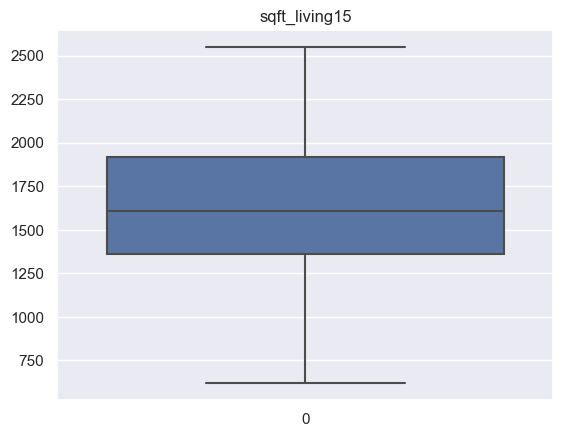

In [3320]:
df = df.drop(df[df['sqft_living15'] >2550].index)
sns.boxplot(df['sqft_living15'])
plt.title('sqft_living15')

In [3321]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'house_age', 'reno_age', 'year',
       'month'],
      dtype='object')

Text(0.5, 1.0, 'sqft_lot15')

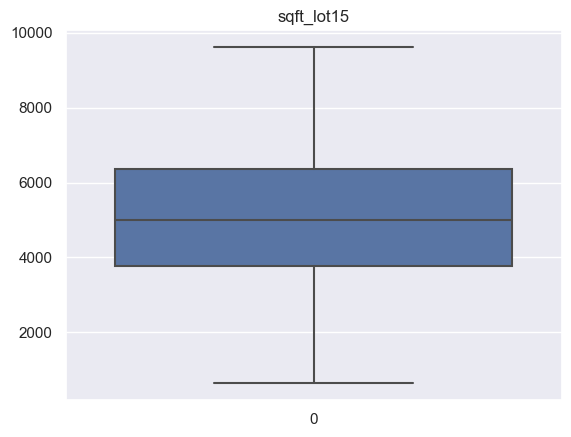

In [3322]:
df = df.drop(df[df['sqft_lot15'] >9621].index)
sns.boxplot(df['sqft_lot15'])
plt.title('sqft_lot15')

In [3323]:
df = df.drop(df[df['sqft_above'] > 1800].index)
df = df.drop(df[df['sqft_above'] < 1190].index)



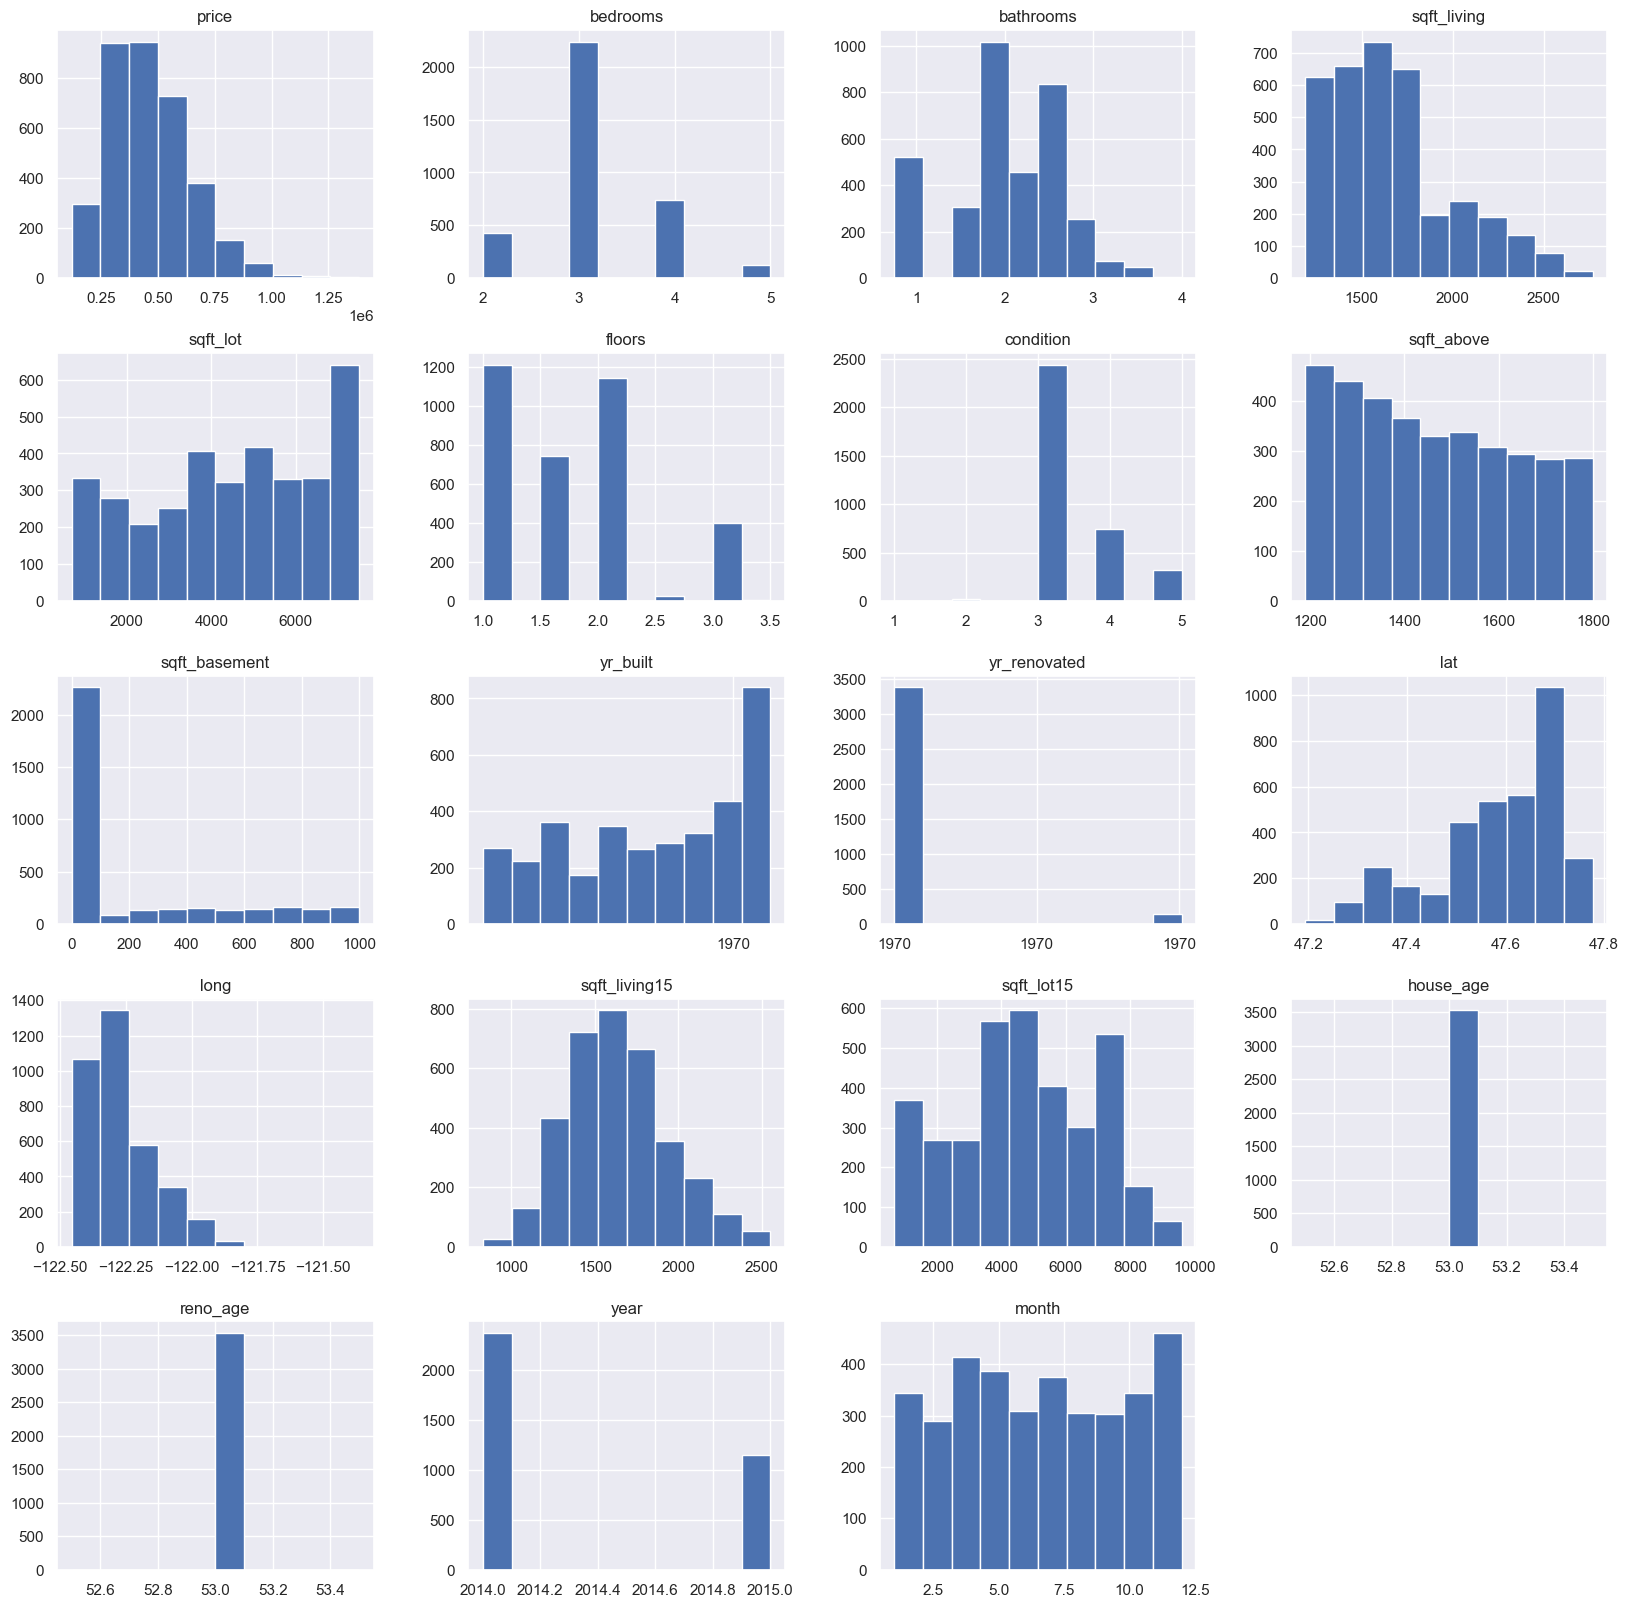

In [3325]:
# check the distributions
df.hist(figsize=(20,20))
plt.show()

By checking correlations , to select the variables for building models


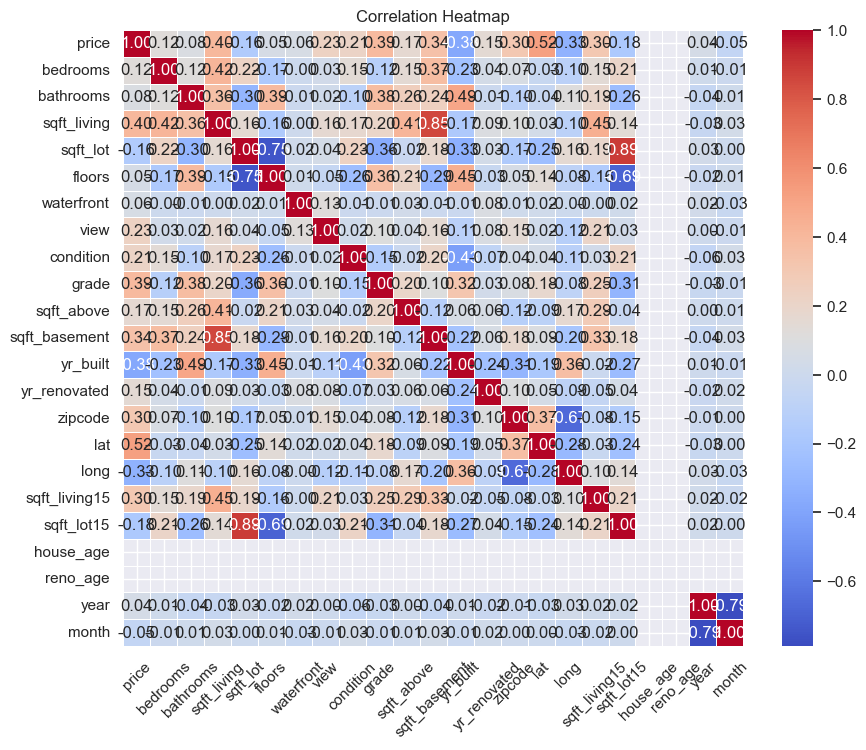

In [3326]:
df_corr = df.corr()
df_corr

plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(df_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels as they are
plt.show()

using stastic model 

In [3327]:
correlations = df.corr()['price'].sort_values(ascending=False)
correlations

price            1.000000
lat              0.521590
sqft_living      0.402409
grade            0.390598
sqft_basement    0.343677
zipcode          0.304309
sqft_living15    0.303818
view             0.225217
condition        0.211344
sqft_above       0.167206
yr_renovated     0.148396
bedrooms         0.123762
bathrooms        0.079858
waterfront       0.064072
floors           0.054278
year             0.043461
month           -0.054574
sqft_lot        -0.155314
sqft_lot15      -0.176452
long            -0.326024
yr_built        -0.378639
house_age             NaN
reno_age              NaN
Name: price, dtype: float64

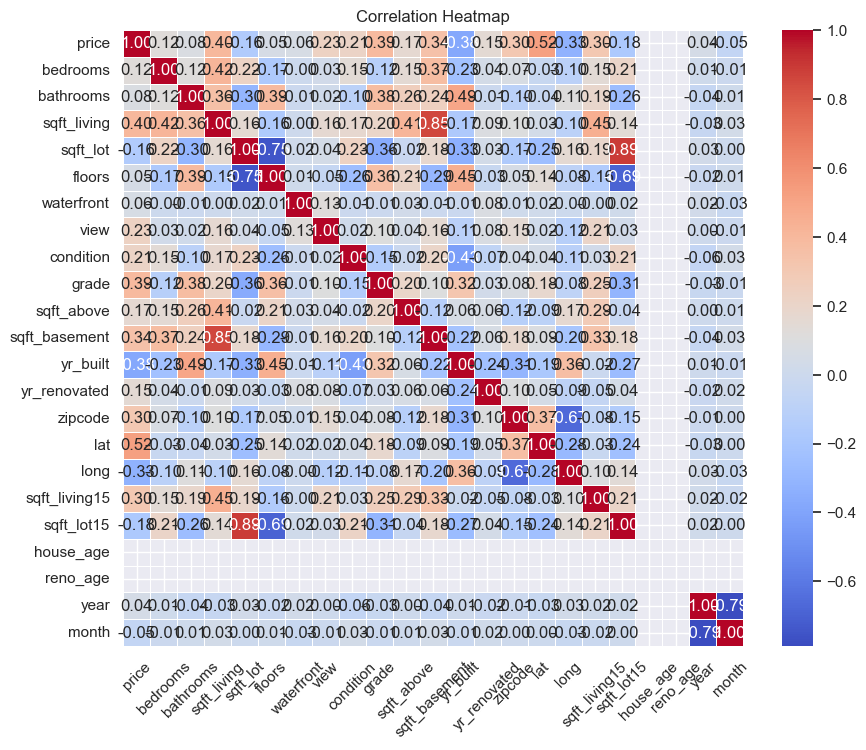

In [3328]:
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(df_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels as they are
plt.show()

In [3329]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'house_age', 'reno_age', 'year',
       'month'],
      dtype='object')

In [3330]:
#  log 'price', 'sqft_living', 'sqft_above', 'sqft_living15'
df['log_price'] = np.log(df['price'])
df['log_sqft_living'] = np.log(df['sqft_living'])
df['log_sqft_lot'] =np.log(df['sqft_lot'])
df['log_sqft_above'] = np.log(df['sqft_above'])
df['log_sqft_living15'] = np.log(df['sqft_living15'])
df['log_sqft_basement'] = np.log(df['sqft_basement'])
df['log_sqft_lot15'] =np.log(df['sqft_lot15'])



C:\Users\mei88\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [3331]:
df2 = df.drop(['price', 'sqft_living', 'sqft_above', 'sqft_lot','sqft_basement', 'sqft_living15','sqft_lot15'], axis=1)


In [3332]:
df2.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'house_age', 'reno_age', 'year', 'month', 'log_price',
       'log_sqft_living', 'log_sqft_lot', 'log_sqft_above',
       'log_sqft_living15', 'log_sqft_basement', 'log_sqft_lot15'],
      dtype='object')

In [3333]:
df2_corr = df2.corr()
df2_corr

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,house_age,reno_age,year,month,log_price,log_sqft_living,log_sqft_lot,log_sqft_above,log_sqft_living15,log_sqft_basement,log_sqft_lot15
bedrooms,1.000000,0.116730,-0.166477,-0.003932,0.027789,0.147182,-0.119357,-0.231157,0.040668,0.068965,-0.028958,-0.098312,NaN,NaN,0.013790,-0.005507,0.107579,0.415416,0.242637,0.149003,0.138419,0.371515,0.225788
bathrooms,0.116730,1.000000,0.389909,-0.007891,0.017475,-0.101759,0.377993,0.490599,-0.009494,-0.099684,-0.038291,0.111311,NaN,NaN,-0.044198,0.013340,0.093540,0.369073,-0.315120,0.260006,0.200366,0.103947,-0.285358
floors,-0.166477,0.389909,1.000000,0.008694,-0.046370,-0.255198,0.359013,0.452456,-0.030333,0.053794,0.140321,-0.082897,NaN,NaN,-0.023809,0.011075,0.082024,-0.149473,-0.791141,0.207081,-0.139842,-0.456564,-0.732758
waterfront,-0.003932,-0.007891,0.008694,1.000000,0.127007,-0.009887,-0.009111,-0.013554,0.080311,0.010726,0.020185,-0.002628,NaN,NaN,0.024134,-0.030493,0.042023,0.006318,0.015710,0.026708,0.001300,NaN,0.017895
view,0.027789,0.017475,-0.046370,0.127007,1.000000,0.021012,0.101967,-0.109339,0.075030,0.152630,0.017877,-0.121358,NaN,NaN,0.004063,-0.012427,0.202592,0.158269,0.042157,0.035956,0.191743,0.053770,0.040889
condition,0.147182,-0.101759,-0.255198,-0.009887,0.021012,1.000000,-0.149919,-0.430442,-0.072887,0.035533,0.036822,-0.106569,NaN,NaN,-0.055525,0.031113,0.185446,0.157768,0.254360,-0.017065,0.016582,0.240283,0.247048
grade,-0.119357,0.377993,0.359013,-0.009111,0.101967,-0.149919,1.000000,0.319068,0.028446,0.075988,0.179265,-0.081084,NaN,NaN,-0.027716,-0.013423,0.401805,0.209585,-0.389068,0.204616,0.262195,-0.105672,-0.332665
yr_built,-0.231157,0.490599,0.452456,-0.013554,-0.109339,-0.430442,0.319068,1.000000,-0.235588,-0.307657,-0.186189,0.364803,NaN,NaN,0.008189,-0.012601,-0.343245,-0.150051,-0.415356,0.059179,-0.001841,-0.260124,-0.357804
yr_renovated,0.040668,-0.009494,-0.030333,0.080311,0.075030,-0.072887,0.028446,-0.235588,1.000000,0.096490,0.045673,-0.085415,NaN,NaN,-0.024015,0.020767,0.129485,0.083075,0.054073,0.061593,-0.058600,0.079256,0.058410
zipcode,0.068965,-0.099684,0.053794,0.010726,0.152630,0.035533,0.075988,-0.307657,0.096490,1.000000,0.370547,-0.668785,NaN,NaN,-0.005729,0.002433,0.318167,0.090052,-0.149407,-0.118728,-0.080669,0.027316,-0.124087


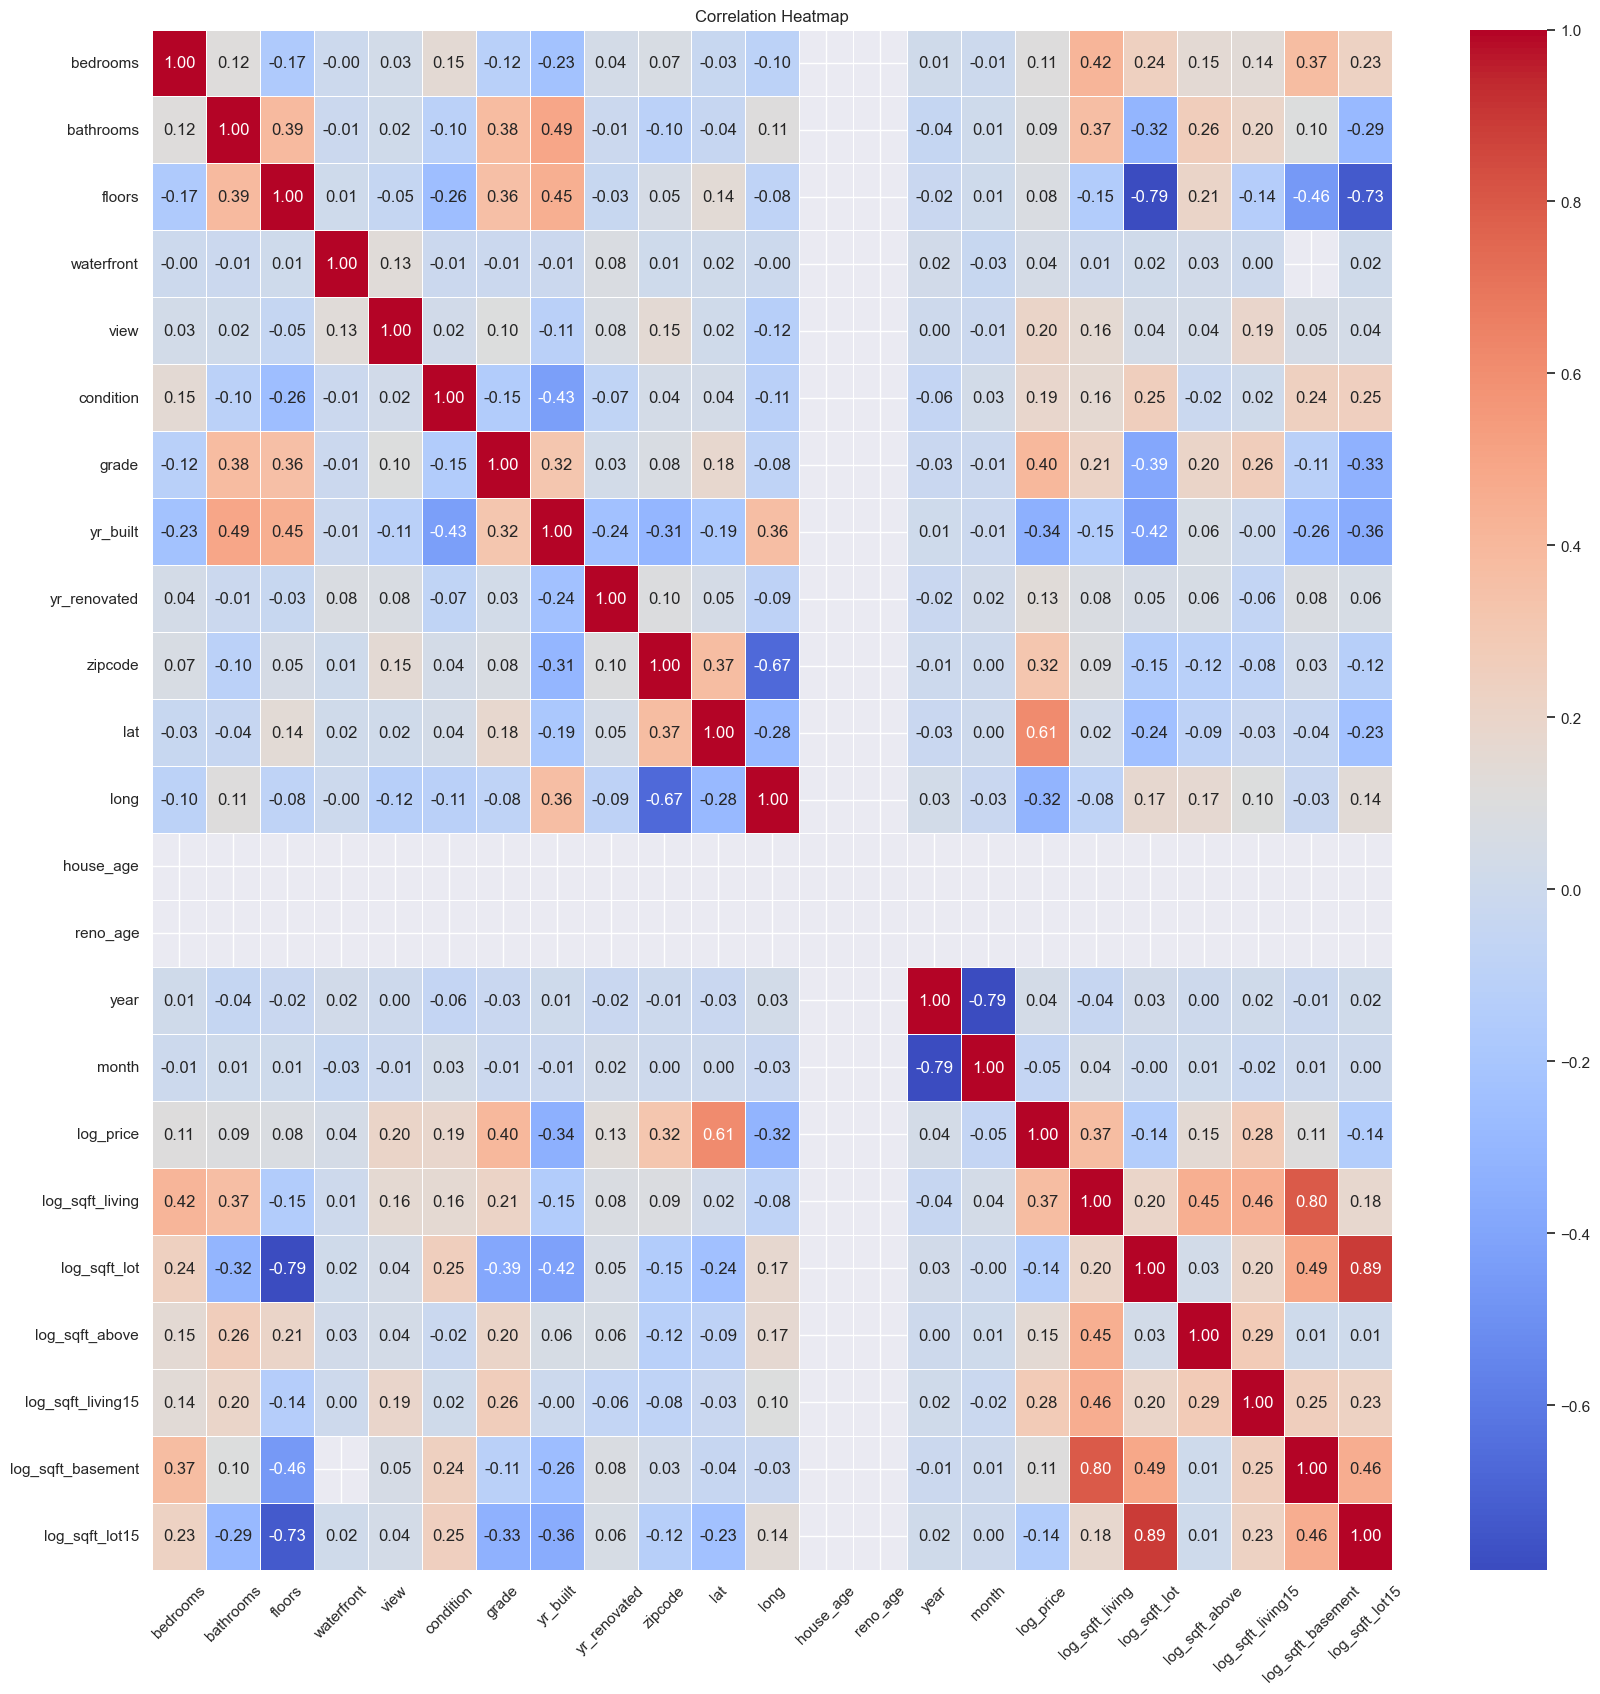

In [3334]:

plt.figure(figsize=(20, 20))  # Set the figure size
sns.heatmap(df2_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels as they are
plt.show()

Log_sqft_lot and log_sqft_lot15 are highly correlated, we will only choose 1 then , after comparing, we will keep log_sqft_lot15 & log_sqft_living15

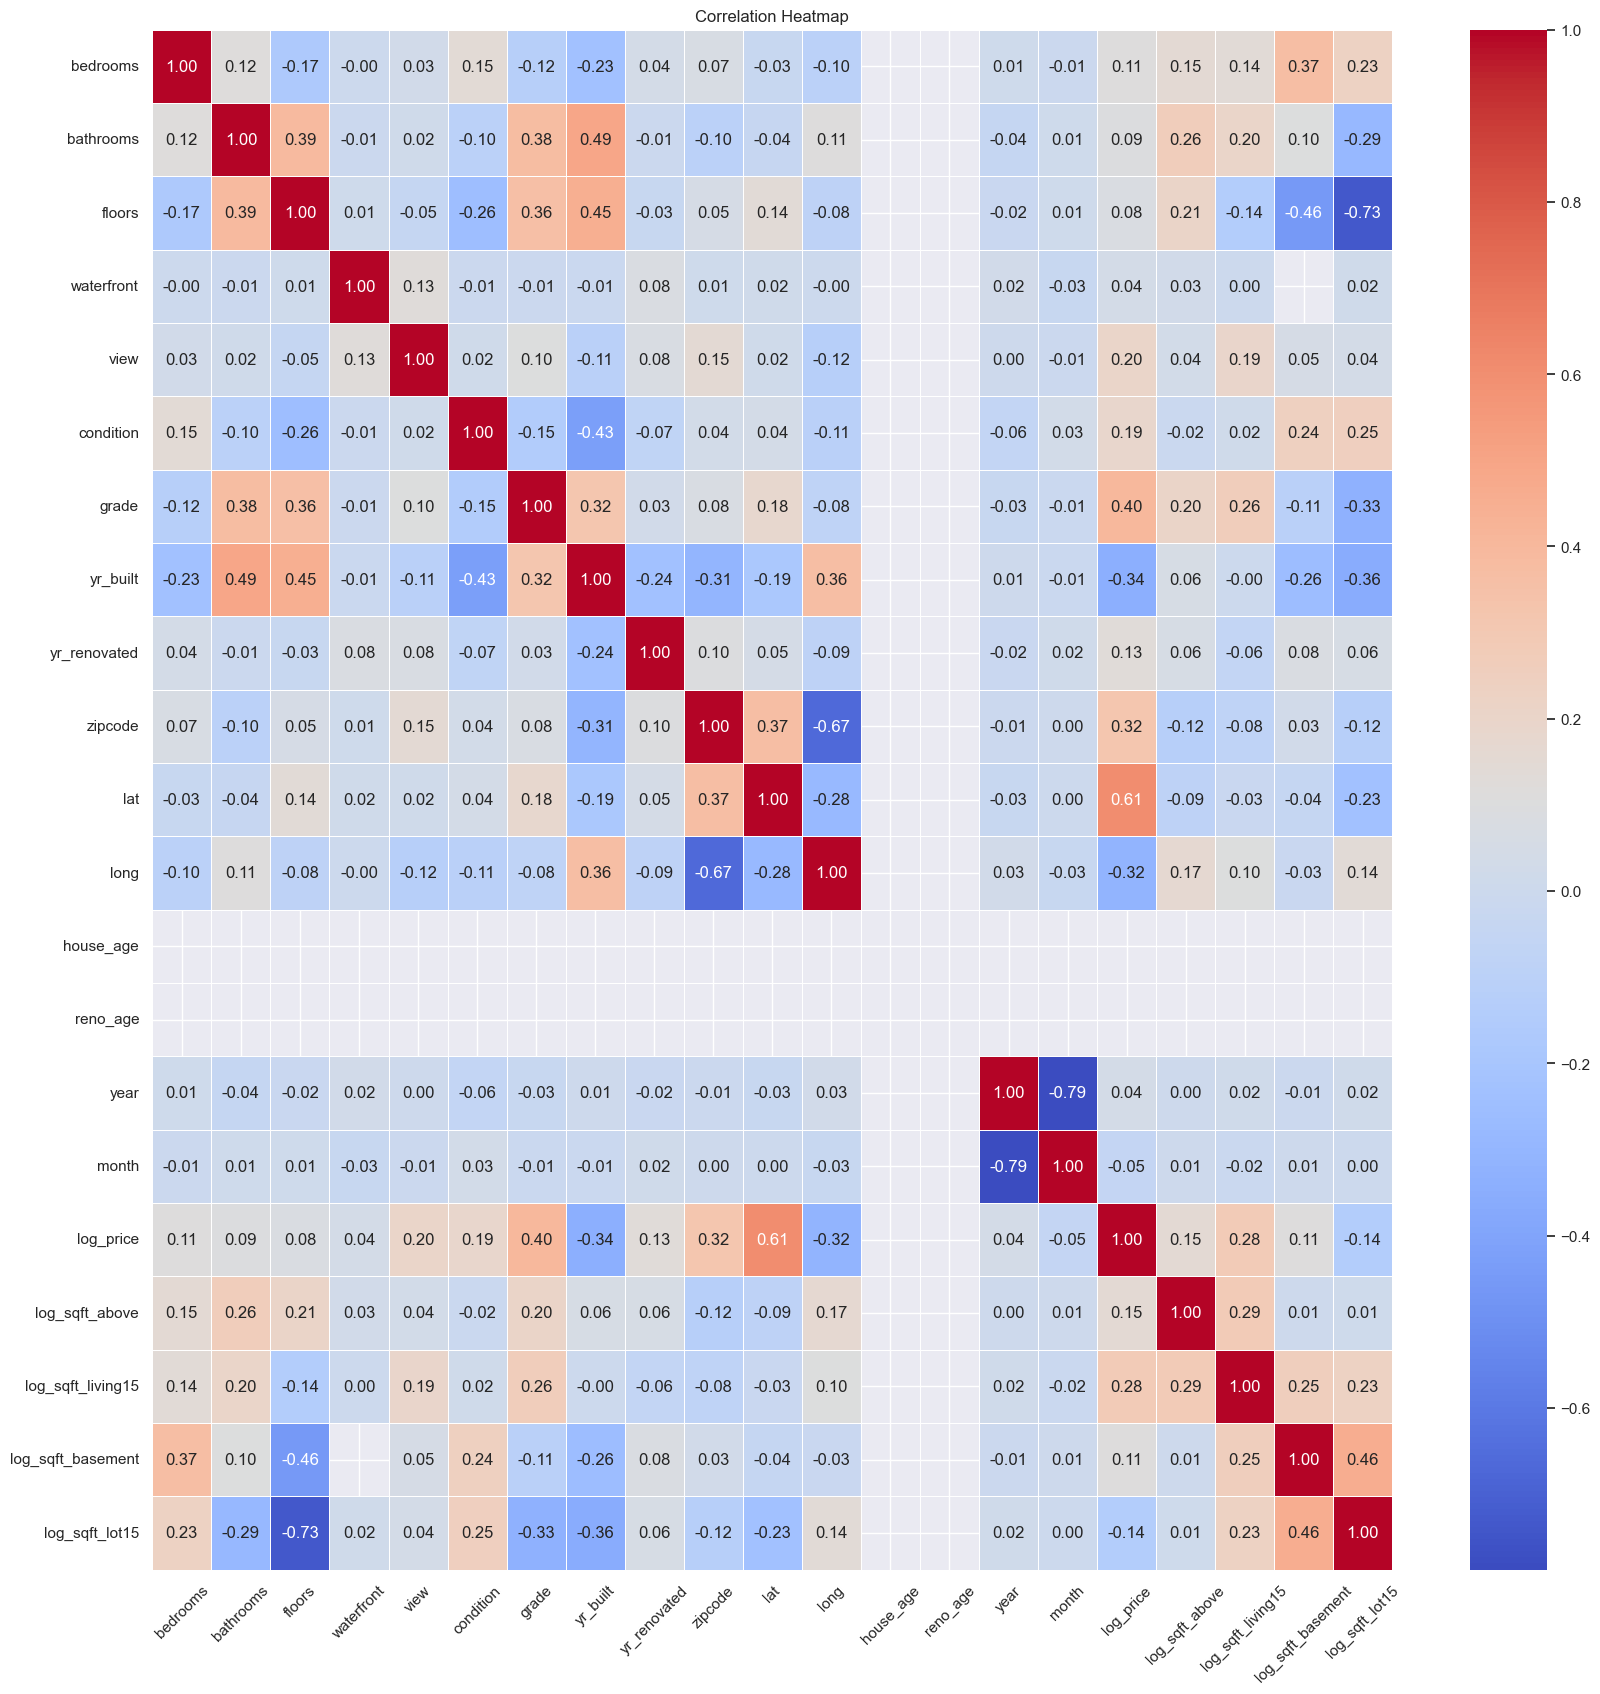

In [3335]:
df3 = df2.drop(['log_sqft_living', 'log_sqft_lot'], axis=1)
df3_corr = df3.corr()
plt.figure(figsize=(20, 20))  # Set the figure size
sns.heatmap(df3_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels as they are
plt.show()

we look at which variables' parameters

In [3336]:
correlations = df3.corr()['log_price'].sort_values(ascending=False)
correlations

log_price            1.000000
lat                  0.608644
grade                0.401805
zipcode              0.318167
log_sqft_living15    0.283419
view                 0.202592
condition            0.185446
log_sqft_above       0.151053
yr_renovated         0.129485
log_sqft_basement    0.109110
bedrooms             0.107579
bathrooms            0.093540
floors               0.082024
waterfront           0.042023
year                 0.040371
month               -0.052795
log_sqft_lot15      -0.143241
long                -0.318365
yr_built            -0.343245
house_age                 NaN
reno_age                  NaN
Name: log_price, dtype: float64

log_sqft_living, log_sqft_above, log_sqft_basement, log_sqft_lot, log_sqft_living15, log_sqft_lot15 are still correlated. 
so we need to remove these variables from the model. 

Run a OLS model, try different combination of variables and screened out below variables. 
zipcode, waterfront, month, log_sqft_basement, floor , reno_age, condition, long, bathroom

In [3337]:
#dummies_view = pd.get_dummies(df3.view, prefix= 'view', dtype= int)
#dummies_waterfront = pd.get_dummies(df.waterfront, prefix='wf',dtype =int)
#dummies_grade = pd.get_dummies(df.grade, prefix='grade', dtype = int)
#dummies_bedrooms = pd.get_dummies(df3.bedrooms, prefix='bedrooms', dtype= int)
#dummies_year = pd.get_dummies(df3.year, prefix='year', dtype= int)
#df4 = pd.concat([df3,dummies_view,dummies_bedrooms,dummies_year], axis=1)


In [3338]:
df3 = df3.drop([7319, 700, 19622, 9105, 19912])

In [3339]:
model_ols = ols('log_price ~  bedrooms + view +grade + lat + year +log_sqft_above + log_sqft_living15 + log_sqft_lot15 + house_age', data = df3)
result_model_ols = model_ols.fit()
print(result_model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     293.3
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:58:29   Log-Likelihood:                -282.22
No. Observations:                3522   AIC:                             596.4
Df Residuals:                    3506   BIC:                             695.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0602      0.00

In [3340]:
variables =['bedrooms','view', 'grade',  'lat',  'year', 'log_sqft_above', 'log_sqft_living15', 'log_sqft_lot15','house_age']
correlations = df3[variables].corr()
print(correlations)

                   bedrooms      view     grade       lat      year  log_sqft_above  log_sqft_living15  log_sqft_lot15  house_age
bedrooms           1.000000  0.030293 -0.120736 -0.028825  0.014478        0.148741           0.139299        0.226169        NaN
view               0.030293  1.000000  0.108444  0.015735 -0.000352        0.033339           0.193989        0.038793        NaN
grade             -0.120736  0.108444  1.000000  0.180677 -0.024388        0.204657           0.261706       -0.333293        NaN
lat               -0.028825  0.015735  0.180677  1.000000 -0.027925       -0.089620          -0.024984       -0.234074        NaN
year               0.014478 -0.000352 -0.024388 -0.027925  1.000000        0.002447           0.019570        0.017766        NaN
log_sqft_above     0.148741  0.033339  0.204657 -0.089620  0.002447        1.000000           0.286103        0.010209        NaN
log_sqft_living15  0.139299  0.193989  0.261706 -0.024984  0.019570        0.286103       

In [3341]:
pred_val = result_model_ols.predict(df3[['bedrooms','view', 'grade',  'lat',  'year', 'log_sqft_above', 'log_sqft_living15', 'log_sqft_lot15','house_age']])

In [3342]:
pred_val.head(5)

6     12.547125
17    13.124687
25    12.138861
26    13.193878
27    13.121202
dtype: float64

In [3343]:
res = pd.concat([pred_val.to_frame().rename(columns = {0:'predict_val'}), df3['log_price']],axis=1)
res['error'] = res['predict_val'] - res['log_price']
res['sq_error'] = res['error']**2
print(res.head(5))
MSE_OSL = np.sqrt(res['sq_error'].mean())
print(MSE_OSL)
R2_OLS = r2_score(res['log_price'], res['predict_val'])
print("R2 Score: ", R2_OLS)

    predict_val  log_price     error  sq_error
6     12.547125  12.458775  0.088350  0.007806
17    13.124687  13.091904  0.032783  0.001075
25    12.138861  12.358794 -0.219933  0.048371
26    13.193878  13.750439 -0.556561  0.309760
27    13.121202  13.410545 -0.289343  0.083719
0.2621577561402927
R2 Score:  0.5565409308930225


(array([  16.,  123.,  407.,  806., 1079.,  687.,  304.,   79.,   16.,
           5.]),
 array([-0.85128421, -0.65736554, -0.46344688, -0.26952822, -0.07560956,
         0.1183091 ,  0.31222777,  0.50614643,  0.70006509,  0.89398375,
         1.08790241]),
 <BarContainer object of 10 artists>)

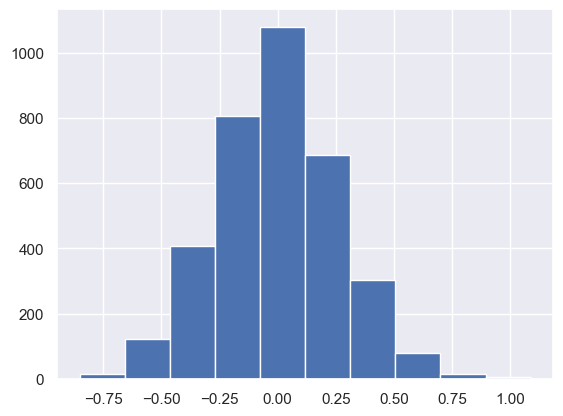

In [3344]:
plt.hist(res['error'])


(array([ 16.,  64., 240., 536., 634., 827., 726., 369.,  96.,  14.]),
 array([11.69524702, 11.93984339, 12.18443976, 12.42903612, 12.67363249,
        12.91822886, 13.16282523, 13.40742159, 13.65201796, 13.89661433,
        14.1412107 ]),
 <BarContainer object of 10 artists>)

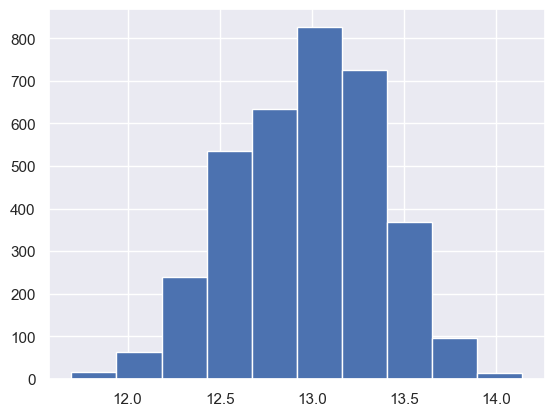

In [3345]:
plt.hist(df3['log_price'])


Text(0.5, 0, 'lat')

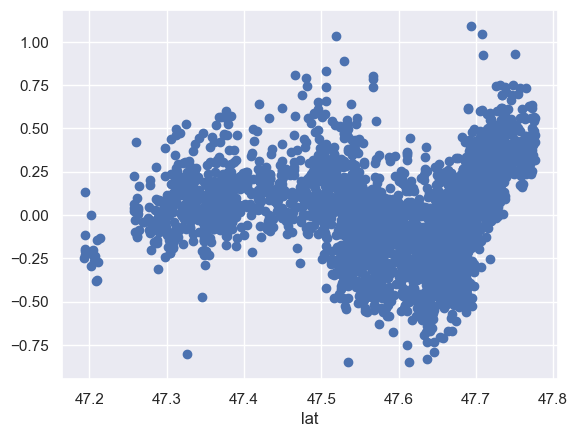

In [3346]:
plt.scatter(df3['lat'], res['error'])
plt.xlabel('lat')

Text(0.5, 0, 'log_sqft_above')

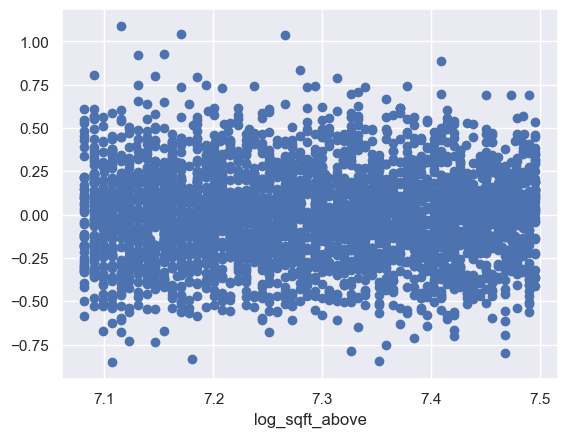

In [3347]:
plt.scatter(df3['log_sqft_above'], res['error'])
plt.xlabel('log_sqft_above')

Text(0.5, 0, 'log_sqft_living15')

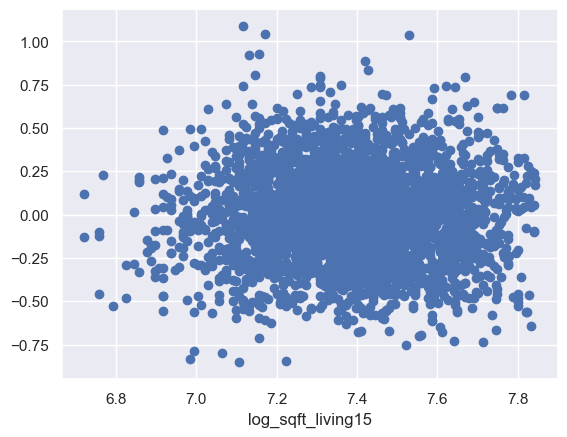

In [3348]:
plt.scatter(df3['log_sqft_living15'], res['error'])
plt.xlabel('log_sqft_living15')

Text(0.5, 0, 'log_sqft_lot15')

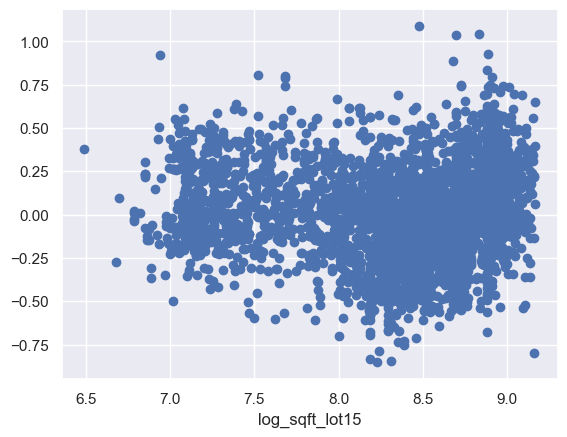

In [3349]:
plt.scatter(df3['log_sqft_lot15'], res['error'])
plt.xlabel('log_sqft_lot15')

((array([-3.54435746, -3.30336368, -3.17024122, ...,  3.17024122,
          3.30336368,  3.54435746]),
  array([-0.85128421, -0.84649333, -0.83135218, ...,  1.03513232,
          1.04446529,  1.08790241])),
 (0.2621818107948441, 1.4166616678819126e-12, 0.9991791246132924))

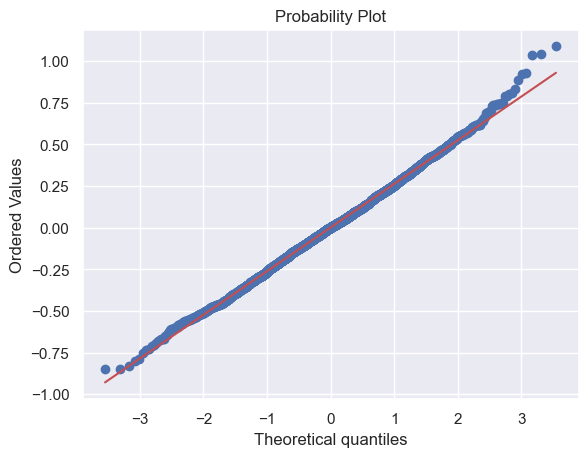

In [3350]:
import scipy. stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist ='norm', plot = ax)


In [3351]:
infl = result_model_ols.get_influence()
print(infl.summary_frame().head())

    dfb_Intercept  dfb_view[T.1]  dfb_view[T.2]  dfb_view[T.3]  dfb_view[T.4]  dfb_grade[T.6]  dfb_grade[T.7]  dfb_grade[T.8]  dfb_grade[T.9]  dfb_grade[T.10]  dfb_bedrooms   dfb_lat  dfb_year  dfb_log_sqft_above  dfb_log_sqft_living15  dfb_log_sqft_lot15  dfb_house_age   cooks_d  standard_resid  hat_diag  dffits_internal  student_resid    dffits
6       -0.005350       0.001077       0.001517       0.001816       0.000664        0.000493        0.000316        0.000973        0.001052         0.000868      0.004299  0.010717  0.004558           -0.005209              -0.009312            0.001071      -0.005350  0.000022       -0.336804  0.003328        -0.019463      -0.336761 -0.019460
17      -0.001308       0.000119       0.000299       0.000227       0.000056       -0.000038       -0.000136        0.000079        0.000093        -0.000020     -0.002245 -0.001608  0.001489           -0.001762               0.000229            0.000537      -0.001308  0.000001       -0.124855  0.00

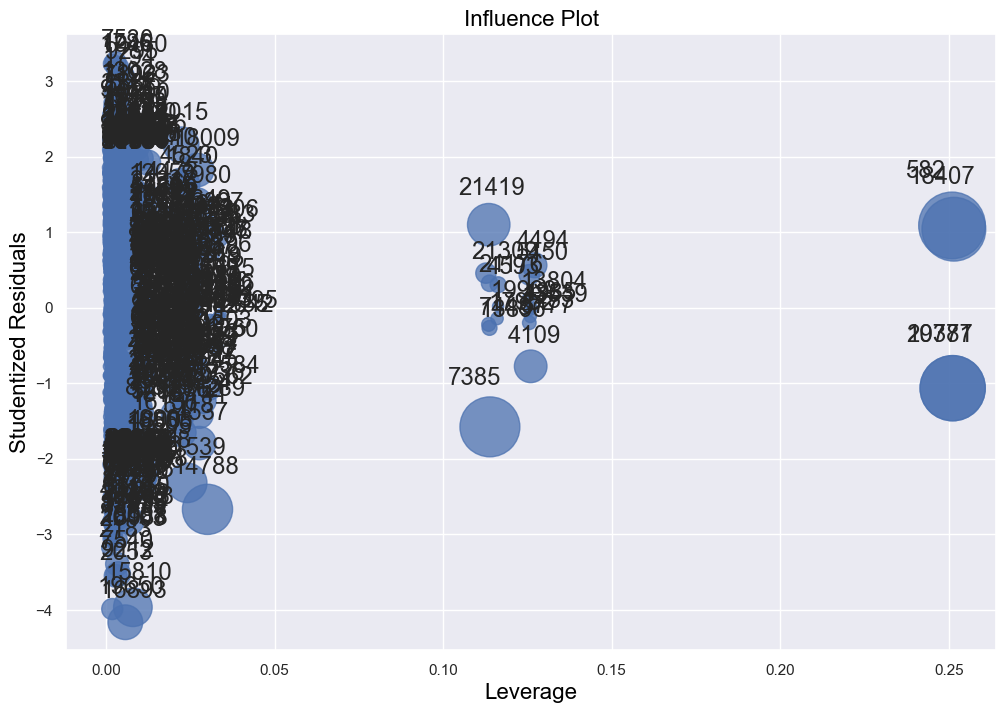

In [3352]:
# this is the updated plot after dropping influencers
fig, ax = plt.subplots(figsize = (12,8))
fig = sm.graphics.influence_plot(result_model_ols, ax=ax, criterion='cooks')

In [3353]:
res.head()

,predict_val,log_price,error,sq_error
6,12.547125,12.458775,0.088350,0.007806
17,13.124687,13.091904,0.032783,0.001075
25,12.138861,12.358794,-0.219933,0.048371
26,13.193878,13.750439,-0.556561,0.309760
27,13.121202,13.410545,-0.289343,0.083719


Feature engineering & build models

In [3354]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
import numpy as np

In [3355]:
df3.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,house_age,reno_age,year,month,log_price,log_sqft_above,log_sqft_living15,log_sqft_basement,log_sqft_lot15
6,3,2.25,2.0,False,0,3,7,1970-01-01 00:00:00.000001995,1970-01-01,98003,47.3097,-122.327,53,53,2014,6,12.458775,7.447168,7.713338,-inf,8.827468
17,4,1.00,1.5,False,0,4,7,1970-01-01 00:00:00.000001916,1970-01-01,98103,47.6648,-122.343,53,53,2014,5,13.091904,7.377759,7.383989,-inf,8.366370
25,3,2.00,1.5,False,0,5,6,1970-01-01 00:00:00.000001941,1970-01-01,98002,47.3048,-122.218,53,53,2014,11,12.358794,7.444249,6.937314,-inf,8.456381
26,3,1.75,2.0,False,0,3,8,1970-01-01 00:00:00.000001915,1970-01-01,98119,47.6386,-122.360,53,53,2014,6,13.750439,7.467371,7.473069,6.55108,8.181161
27,3,1.00,1.5,False,0,5,8,1970-01-01 00:00:00.000001909,1970-01-01,98112,47.6221,-122.314,53,53,2014,12,13.410545,7.244228,7.528332,-inf,8.258681


Variables we used in OLS model: log_price ~  bedrooms + view +grade + lat + year +log_sqft_above + log_sqft_living15 + log_sqft_lot15 + house_age

In [3356]:
df3 = df3.assign(view=df3['view'].astype(object),
                 year=df3['year'].astype(object),
                 grade=df3['grade'].astype(object))


In [3357]:
# seperate features and target 
categorical_features = ['view', 'grade','year']
numerical_features = ['lat','bedrooms','log_sqft_above', 'log_sqft_living15', 'log_sqft_lot15', 'house_age']
target = 'log_price'

In [3358]:
# split date in train/test
X_train, X_test, y_train, y_test = train_test_split(df3[categorial_features + numerical_features], df3[target], test_size =0.3, random_state =1234)
#define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps =[('scaler', StandardScaler())])
#building processor
preprocessor = ColumnTransformer(transformers=[('cat',cat_transformer, categorial_features),('num', num_transformer, numerical_features)])

In [3359]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade', 'year']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'bedrooms',
                                                   'log_sqft_above',
                                                   'log_sqft_living15',
                                                   'log_sqft_lot15',
                                                   'house_age'])])),
                ('regressor', LinearRegression())])

In [3368]:


pred = linear_regression.predict(X_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(pred, y_test))
MSE_LR = np.sqrt(mean_squared_error(pred, y_test))
print('MSE_LR', MSE_LR)
r2_score_ln = r2_score(y_test, pred_ln)
print("R2 Score: ", r2_score_ln)

MSE_LR 0.2639336370560005
R2 Score:  0.5430024145193555


In [ ]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor), 
    ('regressor', Ridge(alpha =3.0))
])


ridge_regression.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade', 'year']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'bedrooms',
                                                   'log_sqft_above',
                                                   'log_sqft_living15',
                                                   'log_sqft_lot15',
                                                   'house_age'])])),
                ('regressor', Ridge(alpha=3.0))])

In [ ]:
pred_ridge = ridge_regression.predict(X_test)
np.sqrt(mean_squared_error(pred_ridge, y_test))
MSE_RG = np.sqrt(mean_squared_error(pred_ridge, y_test))
print(MSE_RG)
r2_score_rg = r2_score(y_test, pred_ridge)
print("R2 Score: ", r2_score_rg)



0.231280269858688
R2 Score:  0.6512634094932856


In [ ]:
lasso_regression = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha = 1.0))
])

lasso_regression.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade', 'year']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'bedrooms',
                                                   'log_sqft_above',
                                                   'log_sqft_living15',
                                                   'log_sqft_lot15',
                                                   'house_age'])])),
                ('regressor', Lasso())])

In [ ]:
lasso_pred = lasso_regression.predict(X_test)
np.sqrt(mean_squared_error(lasso_pred, y_test))
MSE_LS = np.sqrt(mean_squared_error(lasso_pred, y_test))
print(MSE_LS)
r2_score_la = r2_score(y_test, pred_ridge)
print("R2 Score: ", r2_score_rg)

0.39188029312434824
R2 Score:  0.6512634094932856


In [ ]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio = 0.8))
])

elasticnet_regression.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade', 'year']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'bedrooms',
                                                   'log_sqft_above',
                                                   'log_sqft_living15',
                                                   'log_sqft_lot15',
                                                   'house_age'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [ ]:
elasticnet_pred = elasticnet_regression.predict(X_test)
np.sqrt(mean_squared_error(elasticnet_pred, y_test))
MSE_EL = np.sqrt(mean_squared_error(elasticnet_pred, y_test))
print(MSE_EL)
r2_score_el = r2_score(y_test, pred_ridge)
print("R2 Score: ", r2_score_rg)

0.39188029312434824
R2 Score:  0.6512634094932856


In [ ]:
y_test.head()

13333    12.691580
14141    12.323856
12028    12.860999
21112    13.203575
265      12.577636
Name: log_price, dtype: float64

In [ ]:
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)

In [ ]:
elastic_net_pred['res'] = elastic_net_pred['pred'] - elastic_net_pred['log_price']

categorical_features = ['view', 'grade','year']
numerical_features = ['lat','bedrooms','log_sqft_above', 'log_sqft_living15', 'log_sqft_lot15', 'house_age']

Text(0.5, 1.0, 'log_sqft_living15')

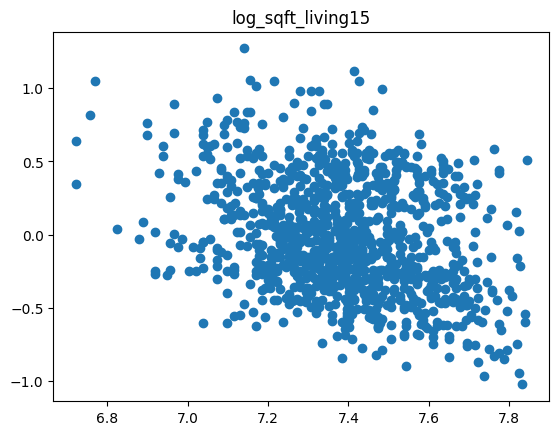

In [ ]:
plt.scatter(X_test['log_sqft_living15'], elastic_net_pred['res'])
plt.title('log_sqft_living15')

Text(0.5, 1.0, 'house_age')

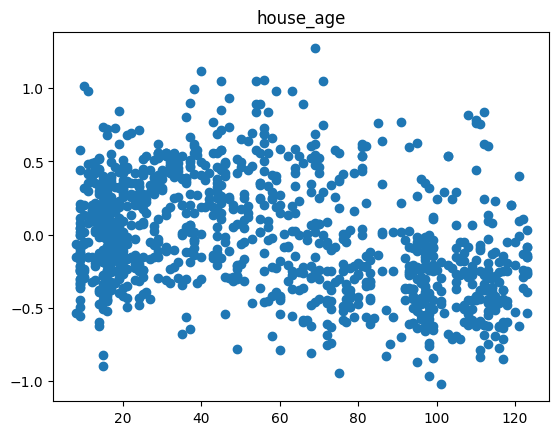

In [ ]:
plt.scatter(X_test['house_age'], elastic_net_pred['res'])
plt.title('house_age')

Text(0.5, 1.0, 'log_sqft_lot15')

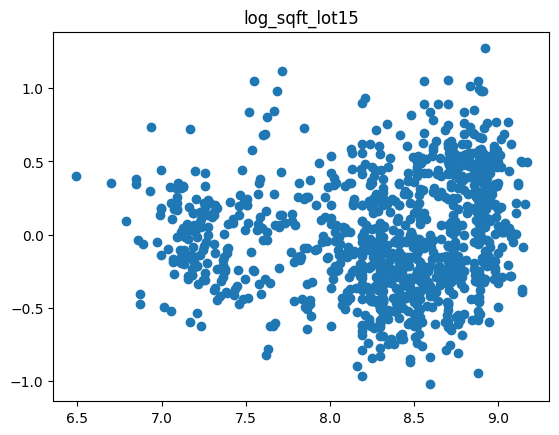

In [ ]:
plt.scatter(X_test['log_sqft_lot15'], elastic_net_pred['res'])
plt.title('log_sqft_lot15')

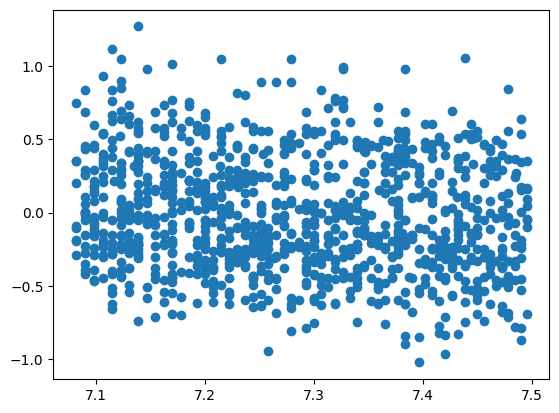

In [ ]:
plt.scatter(X_test['log_sqft_above'], elastic_net_pred['res'])

Text(0.5, 1.0, 'lat')

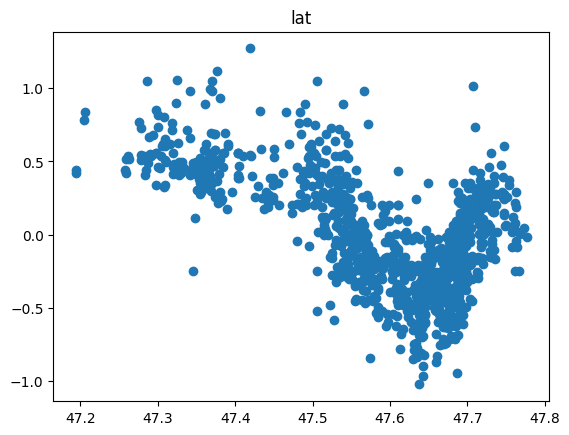

In [ ]:
plt.scatter(X_test['lat'], elastic_net_pred['res'])
plt.title('lat')

Summarize the performance of all models

In [3369]:
print({'MSE_OSL': MSE_OSL, 'MSE_LR':MSE_LR, 'MSE_RG': MSE_RG,  'MSE_LS': MSE_LS,'MSE_EL': MSE_LR})
print({'R2_OLS': R2_OLS, 'r2_score_ln': r2_score_ln, 'r2_score_rg': r2_score_rg, 'r2_score_la' : r2_score_la, 'r2_score_el': r2_score_el})

{'MSE_OSL': 0.2621577561402927, 'MSE_LR': 0.2639336370560005, 'MSE_RG': 0.2639336370560005, 'MSE_LS': 0.39188029312434824, 'MSE_EL': 0.2639336370560005}
{'R2_OLS': 0.5565409308930225, 'r2_score_ln': 0.5430024145193555, 'r2_score_rg': 0.6512634094932856, 'r2_score_la': 0.6512634094932856, 'r2_score_el': 0.6512634094932856}


First all, I checked the data distribution.

Second, I conducted data cleaning by , remove outliers, drop unneccessary columns, create new meaning columns, convert datatype, convert dummie variables.

Then checked the correlation between variabls, decide to log the price and varaibles related with sqft to normalize the distribution

The most important parts is to play around with combination of variables using OSL model to identify the variables used for building the model by check their P-value, removed those variables with P-value greater than 5%. 

After the data cleaning and identify variables. I build OSL, Ridge, LASSO, and Elastic models, and checked the influencers, leveraging, residual plots. 

Overall, in my analysis, OSL model perform thee best result with the least MSE and the best R2_score


By exclude some variables with high correlation which caused multicolleanrity, and check the coeeficience in OLS summary report and by checking the correlationship between independent variables and dependent variable. we found 'lat' which reprents location impact the price the most, the other impacting orders from high to low are: log_sqft_living 15, log_sqft_above, grade, view, year(selling year), house_age, bedrooms, however, log_sqft_lot15 have negative impact to price. 
